In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ANZ_Virtual_Internship/ANZ synthesised transaction dataset.xlsx")
df.to_csv("/content/drive/My Drive/Colab Notebooks/ANZ_Virtual_Internship/ANZ synthesised transaction dataset.csv", sep=",")

In [0]:
df.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [0]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [0]:
df.shape

(12043, 23)

In [0]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [0]:
print(df['status'].unique())
print(df['bpay_biller_code'].unique())
print(df['txn_description'].unique())
print(df['movement'].unique())

['authorized' 'posted']
[nan 0 ' THE DISCOUNT CHEMIST GROUP'
 ' LAND WATER & PLANNING East Melbourne']
['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']
['debit' 'credit']


# **From the dataset**

In [0]:
data = df

**Checking the null values**

In [0]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

**Visualizing the null values**

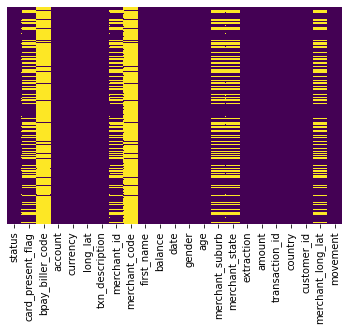

In [232]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [0]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


From the overall transaction, the maximum amount transacted is 8835.98 AUD.

The overall transaction mean is 187 AUD

In [0]:
data['amount'].value_counts().sort_values(ascending=False).head(10)

33.0    168
39.0    119
29.0    116
36.0    107
45.0    102
28.0     92
43.0     91
20.0     85
22.0     82
17.0     81
Name: amount, dtype: int64

The amount ranging between 15AUD and 45AUD has been transacted the most.

In [0]:
data['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

More no. of transactions have been made by male account holders.

In [0]:
data['age'].value_counts().sort_values(ascending=False).head(5)

26    893
38    767
20    765
21    733
24    732
Name: age, dtype: int64

Mostly people between the age group of 20 to 40 have many transactions from their account.

# **Grouping customers with their amount**

In [0]:
cust_amount = df[['customer_id','amount']]

In [0]:
cust_amount.head()

,customer_id,amount
0,CUS-2487424745,16.25
1,CUS-2487424745,14.19
2,CUS-2142601169,6.42
3,CUS-1614226872,40.90
4,CUS-2487424745,3.25


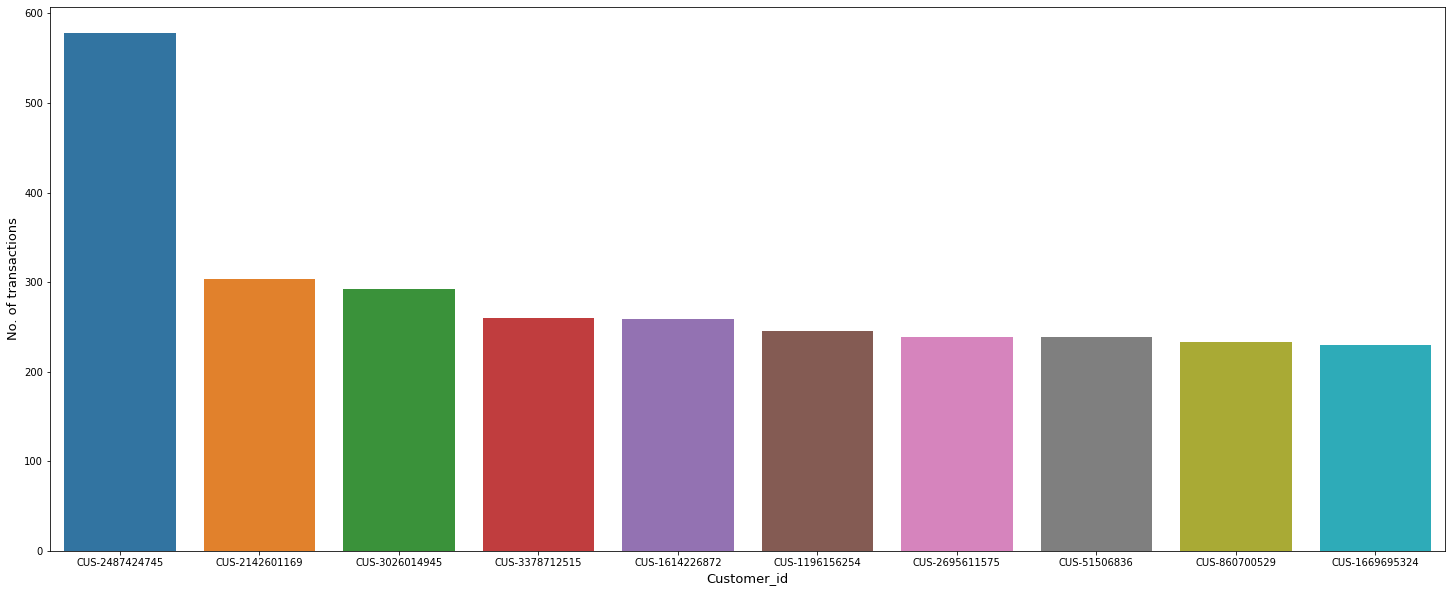

In [0]:
cust_amount_count = cust_amount.groupby('customer_id')['amount'].count().sort_values(ascending=False).head(10)
plt.subplots(figsize=(25, 10))
sns.barplot(cust_amount_count.index, cust_amount_count.values)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('Customer_id', fontsize=13)
plt.show()

In [0]:
cust_amount_count

customer_id
CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
CUS-1196156254    245
CUS-2695611575    239
CUS-51506836      239
CUS-860700529     233
CUS-1669695324    230
Name: amount, dtype: int64

The top 5 highest number of transactions were done by customer_id's CUS-2487424745, CUS-2142601169, CUS-3026014945, CUS-3378712515, CUS-1614226872

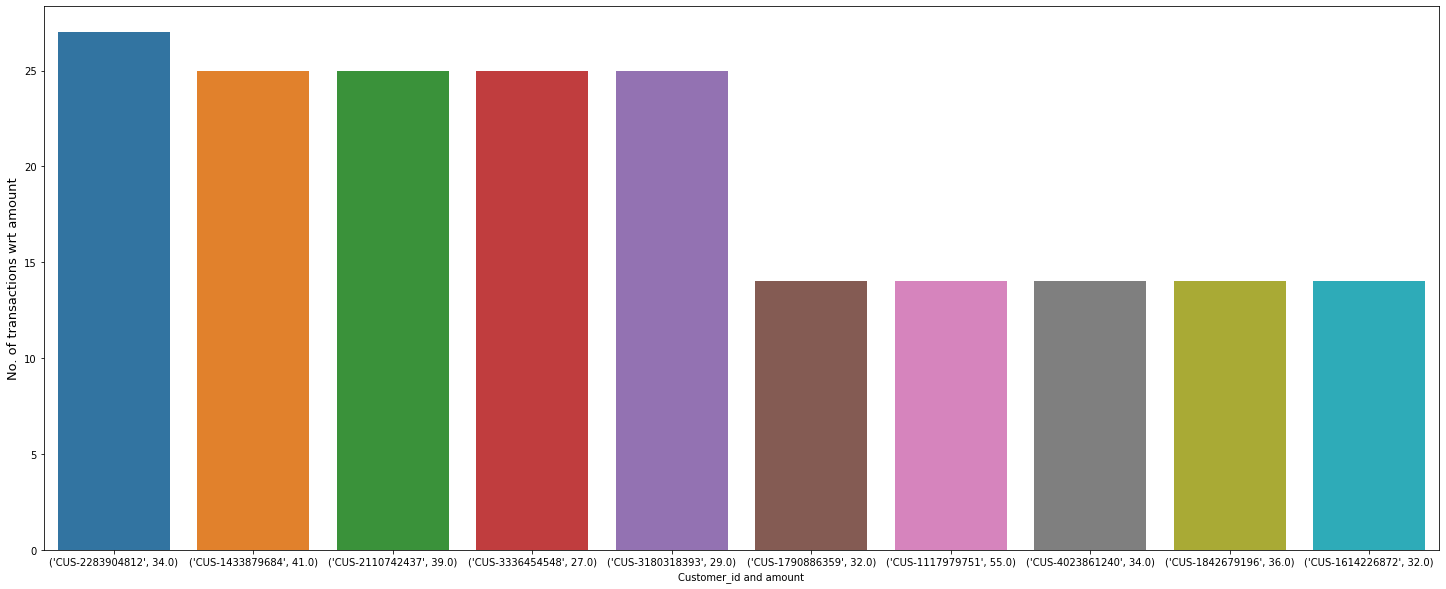

In [0]:
cust_amount_value_count = cust_amount.groupby('customer_id')['amount'].value_counts().sort_values(ascending=False).head(10)
plt.subplots(figsize=(25, 10))
sns.barplot(cust_amount_value_count.index, cust_amount_value_count.values)
plt.ylabel('No. of transactions wrt amount', fontsize=13)
plt.xlabel('Customer_id and amount', fontsize=10)
plt.show()

In [0]:
cust_amount.groupby('customer_id')['amount'].value_counts().sort_values(ascending=False).head(10)

customer_id     amount
CUS-2283904812  34.0      27
CUS-1433879684  41.0      25
CUS-2110742437  39.0      25
CUS-3336454548  27.0      25
CUS-3180318393  29.0      25
CUS-1790886359  32.0      14
CUS-1117979751  55.0      14
CUS-4023861240  34.0      14
CUS-1842679196  36.0      14
CUS-1614226872  32.0      14
Name: amount, dtype: int64

In [0]:
cust_amount.groupby('customer_id')['amount'].mean().sort_values(ascending=False).tail(10)

customer_id
CUS-1433879684    100.408774
CUS-1669695324    100.306783
CUS-443776336      99.601529
CUS-3026014945     99.569658
CUS-2695611575     89.874351
CUS-3378712515     87.546000
CUS-2142601169     78.206106
CUS-860700529      77.681888
CUS-1614226872     74.465019
CUS-2487424745     45.348772
Name: amount, dtype: float64

On an average more than 45 AUD have been transacted per customer in three months.

In [0]:
cust_amount.groupby('customer_id')['amount'].max().sort_values(ascending=False).head(10)

customer_id
CUS-1816693151    8835.98
CUS-1271030853    7081.09
CUS-2178051368    6107.23
CUS-51506836      6024.49
CUS-2376382098    5103.51
CUS-497688347     4910.90
CUS-1739931018    4863.62
CUS-261674136     4405.30
CUS-2738291516    4233.00
CUS-527400765     4216.04
Name: amount, dtype: float64

# **Grouping date and amount**

In [0]:
date_amount = df[['date','amount']]

In [0]:
date_amount.head()

,date,amount
0,2018-08-01,16.25
1,2018-08-01,14.19
2,2018-08-01,6.42
3,2018-08-01,40.90
4,2018-08-01,3.25


In [0]:
date_amount.tail()

,date,amount
12038,2018-10-31,9.79
12039,2018-10-31,63.87
12040,2018-10-31,43.96
12041,2018-10-31,30.77
12042,2018-10-31,22.36


We have transactions of three months (August,September and October)

In [0]:
date_amount['date'] = pd.to_datetime(date_amount['date'])
date_amount.set_index('date', inplace=True)
date_amount.index

DatetimeIndex(['2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01',
               ...
               '2018-10-31', '2018-10-31', '2018-10-31', '2018-10-31',
               '2018-10-31', '2018-10-31', '2018-10-31', '2018-10-31',
               '2018-10-31', '2018-10-31'],
              dtype='datetime64[ns]', name='date', length=12043, freq=None)

In [0]:
date_amount.index.month

Int64Index([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name='date', length=12043)

In [0]:
date_amount.head()

,amount
date,
2018-08-01,16.25
2018-08-01,14.19
2018-08-01,6.42
2018-08-01,40.90
2018-08-01,3.25


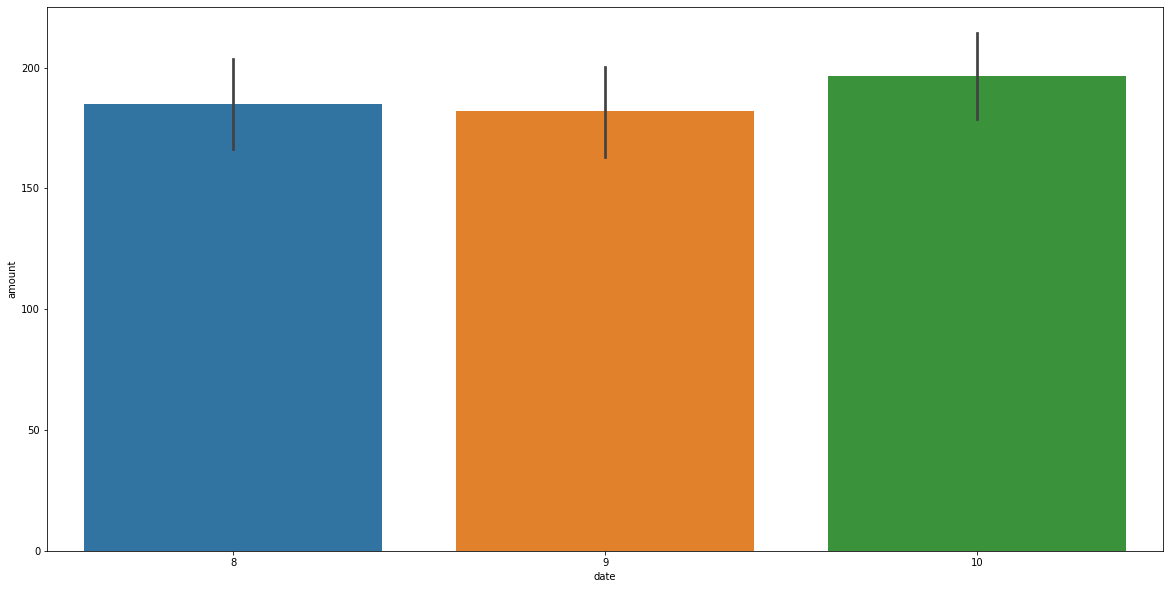

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.barplot(x=date_amount.index.month, y='amount', data = date_amount)    #passing palette='winter' param in here gives diff color
plt.show()

Among all the three months transactions were highest in October.

# **August**

In [0]:
august_amount = date_amount[date_amount.index.month == 8]

In [0]:
august_amount[august_amount.index.day == 16]

,amount
date,


In [0]:
type(august_amount.index)

pandas.core.indexes.datetimes.DatetimeIndex

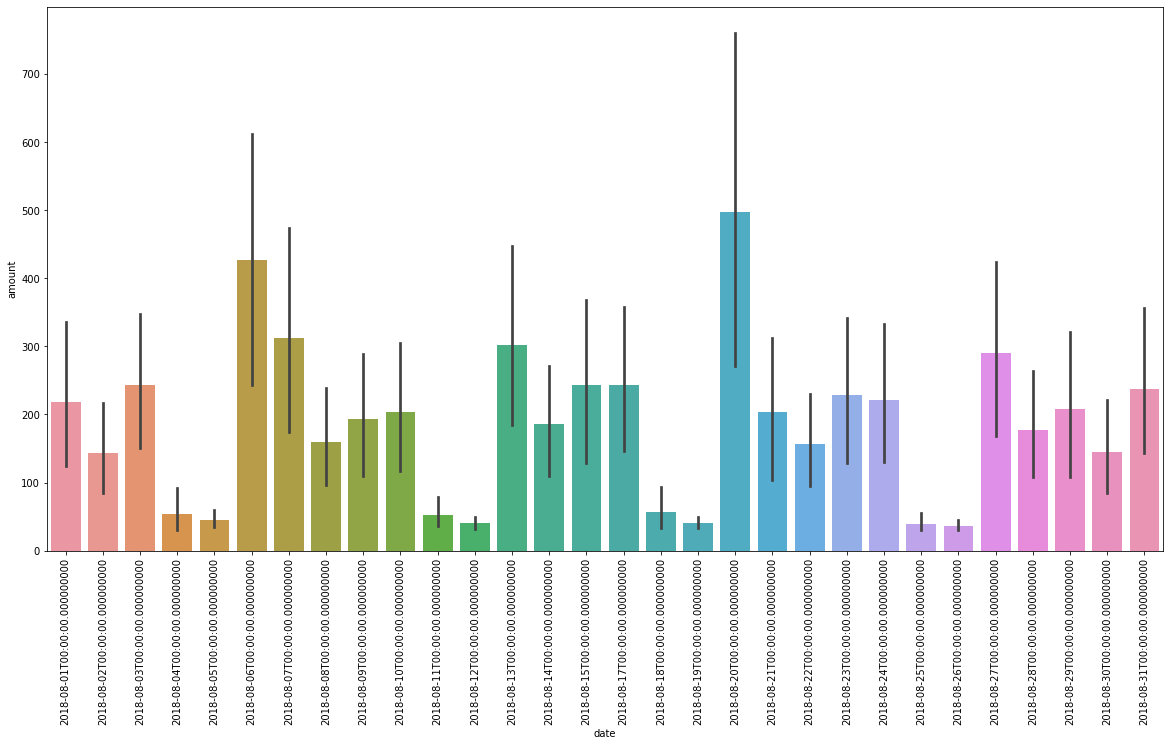

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.xticks(x=august_amount.index, label=august_amount.index, rotation='vertical')
sns.barplot(x=august_amount.index, y=august_amount['amount'], data = august_amount)    #passing palette='winter' param in here gives diff color
plt.show()

In [0]:
grouped_august = august_amount.groupby('date')['amount'].mean()

In [0]:
grouped_august.head()

date
2018-08-01    218.014161
2018-08-02    143.331053
2018-08-03    242.653376
2018-08-04     53.356356
2018-08-05     44.265000
Name: amount, dtype: float64

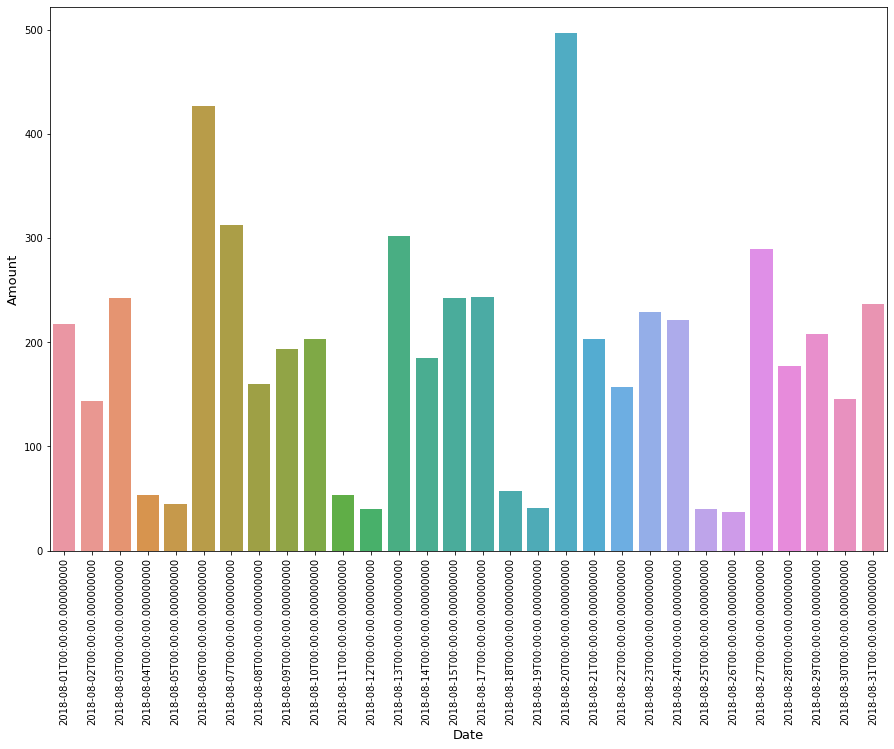

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_august.index, label=grouped_august.index, rotation='vertical')
sns.barplot(grouped_august.index, grouped_august.values)
plt.ylabel('Amount', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

On an average more than 450 AUD has been transacted on August 20 which is the highest amount of this month.

In [0]:
grouped_august_count = august_amount.groupby('date')['amount'].count()

In [0]:
grouped_august_count.head()

date
2018-08-01    137
2018-08-02    152
2018-08-03    157
2018-08-04    118
2018-08-05    100
Name: amount, dtype: int64

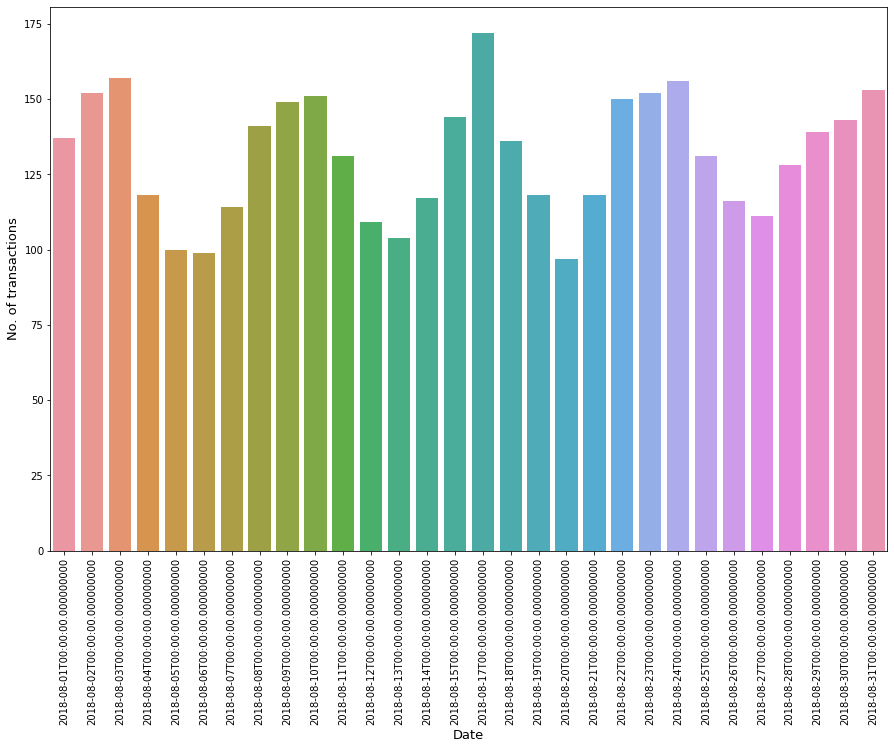

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_august_count.index, label=grouped_august_count.index, rotation='vertical')
sns.barplot(grouped_august_count.index, grouped_august_count.values)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

More number of transactions have happened on August 17.

In [0]:
grouped_august_max = august_amount.groupby('date')['amount'].max()

In [0]:
grouped_august_max.head()

date
2018-08-01    3903.95
2018-08-02    3195.01
2018-08-03    3785.78
2018-08-04    1909.04
2018-08-05     546.94
Name: amount, dtype: float64

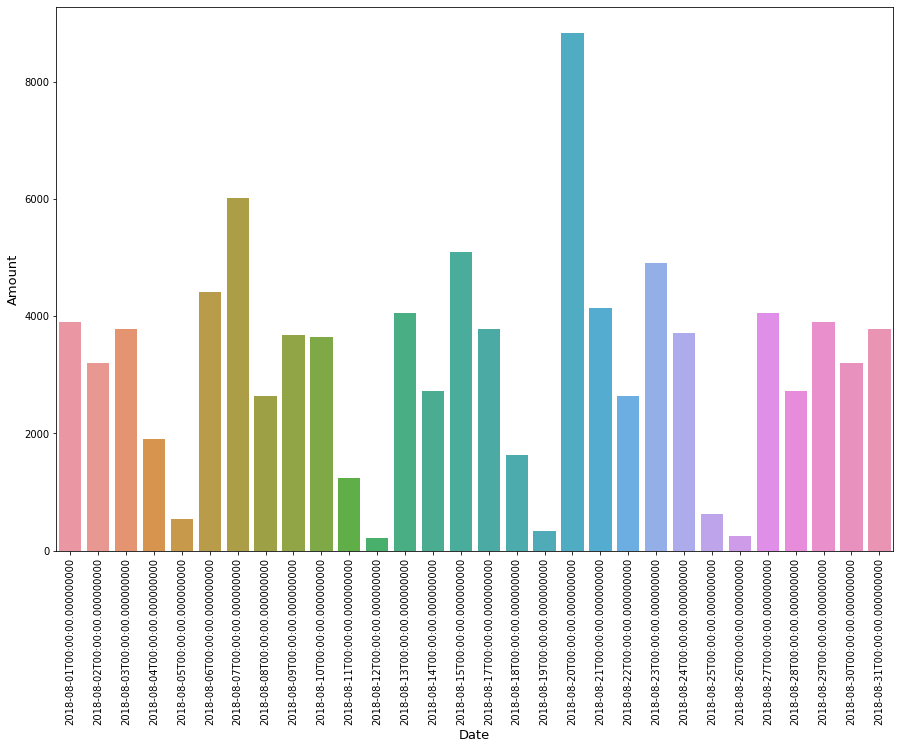

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_august_max.index, label=grouped_august_max.index, rotation='vertical')
sns.barplot(grouped_august_max.index, grouped_august_max.values)
plt.ylabel('Amount', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

On August 20 more than 8000 AUD has been transacted.

There is no entry of August 16 2018

# **September**

In [0]:
september_amount = date_amount[date_amount.index.month == 9]

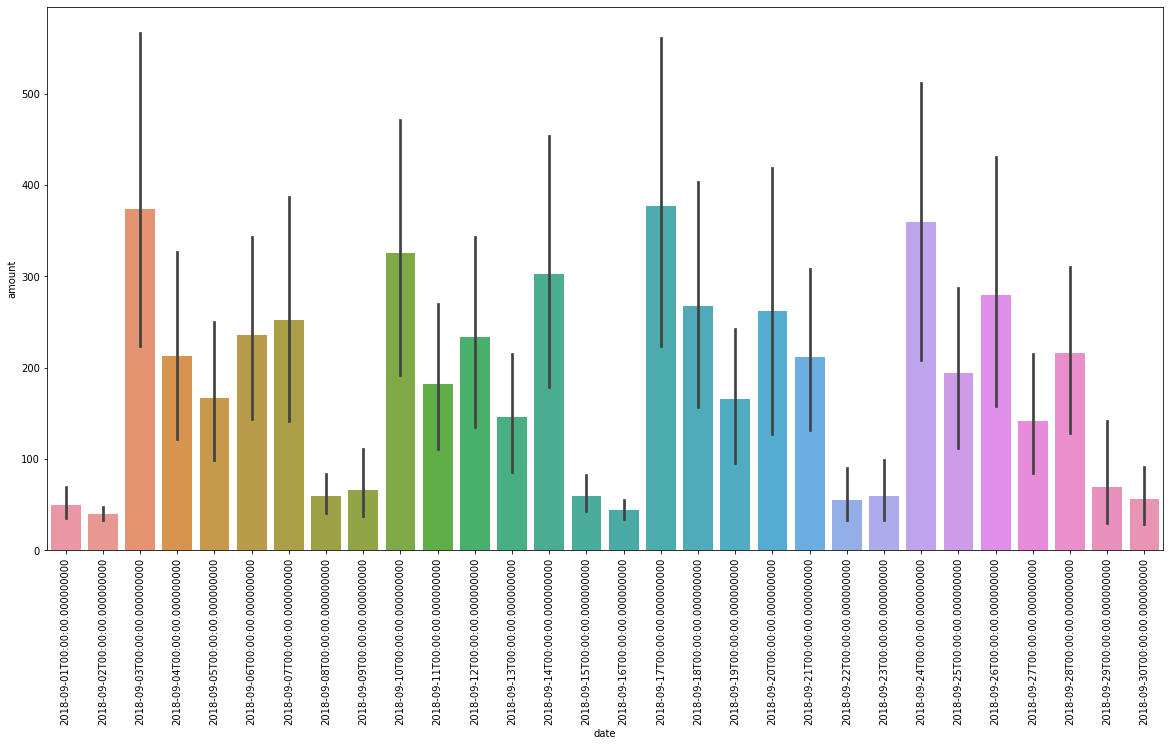

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.xticks(x=september_amount.index, label=september_amount.index, rotation='vertical')
sns.barplot(x=september_amount.index, y=september_amount['amount'], data = september_amount)    #passing palette='winter' param in here gives diff color
plt.show()

In [0]:
grouped_september = september_amount.groupby('date')['amount'].mean()

In [0]:
grouped_september.head()

date
2018-09-01     50.079489
2018-09-02     40.295891
2018-09-03    373.833028
2018-09-04    212.621520
2018-09-05    166.275638
Name: amount, dtype: float64

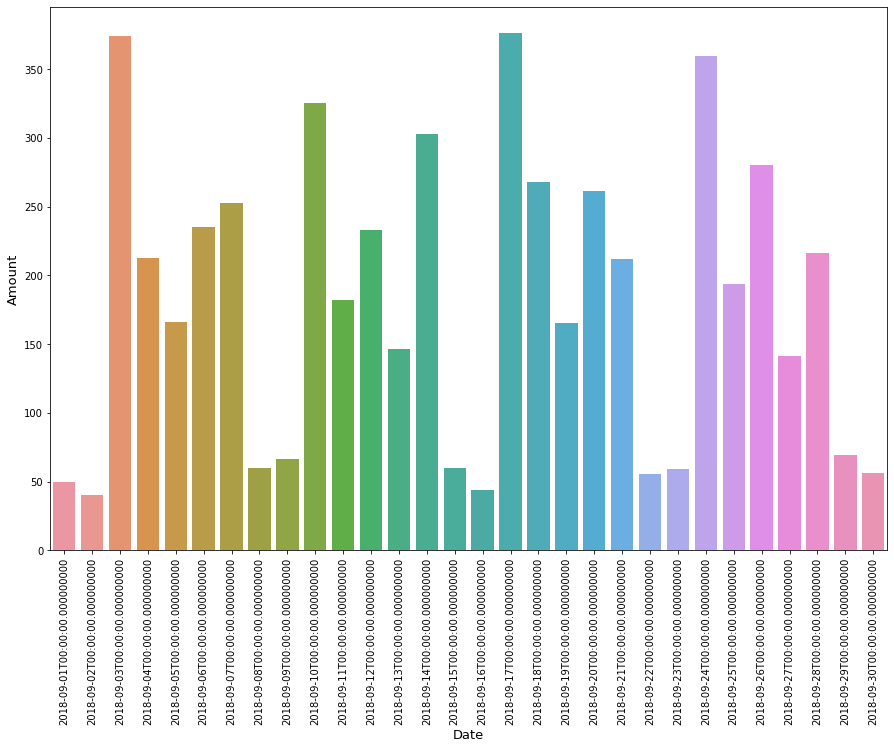

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_september.index, label=grouped_september.index, rotation='vertical')
sns.barplot(grouped_september.index, grouped_september.values)
plt.ylabel('Amount', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

On an average in the month of september more than 350 AUD has been transacted on September 3, September 17 and September 24

In [0]:
grouped_september_count = september_amount.groupby('date')['amount'].count()

In [0]:
grouped_september_count.head()

date
2018-09-01    137
2018-09-02    129
2018-09-03    109
2018-09-04    125
2018-09-05    149
Name: amount, dtype: int64

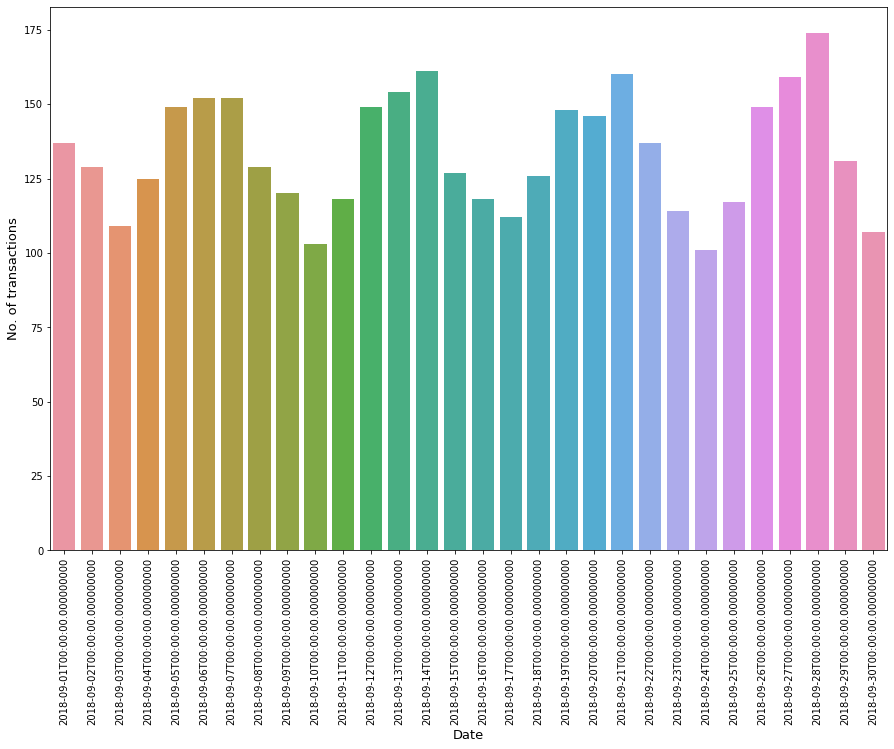

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_september_count.index, label=grouped_september_count.index, rotation='vertical')
sns.barplot(grouped_september_count.index, grouped_september_count.values)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

Highest number of transactions have been done on September 28.

In [0]:
grouped_september_max = september_amount.groupby('date')['amount'].max()

In [0]:
grouped_september_max.head()

date
2018-09-01     846.00
2018-09-02     197.00
2018-09-03    4405.30
2018-09-04    4132.23
2018-09-05    2639.76
Name: amount, dtype: float64

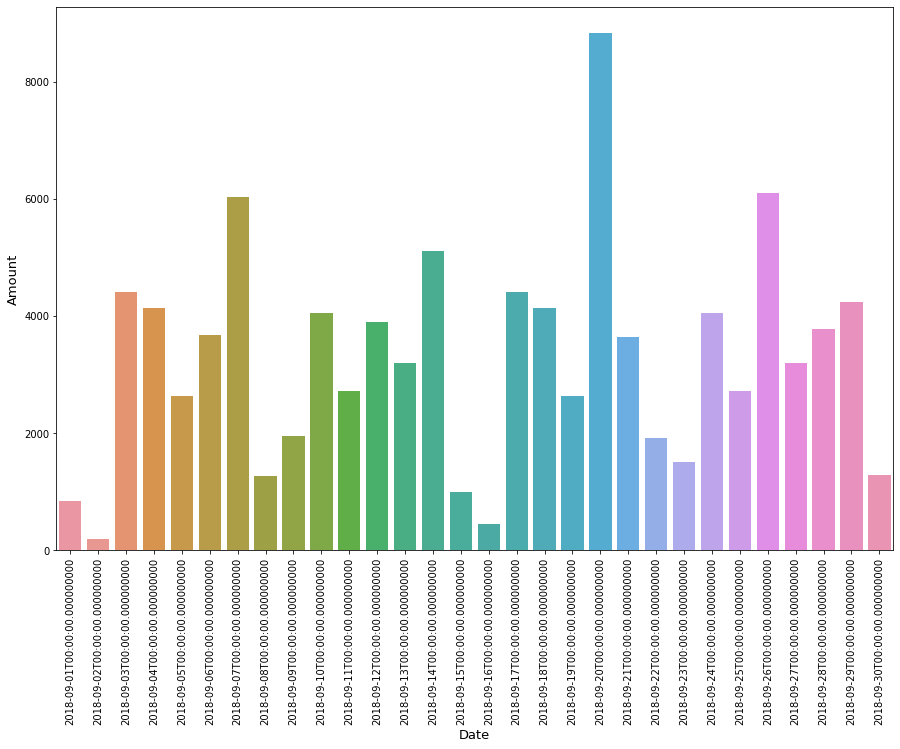

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_september_max.index, label=grouped_september_max.index, rotation='vertical')
sns.barplot(grouped_september_max.index, grouped_september_max.values)
plt.ylabel('Amount', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

More than 8000 AUD has been transacted on September 20.

# **October**

In [0]:
october_amount = date_amount[date_amount.index.month == 10]

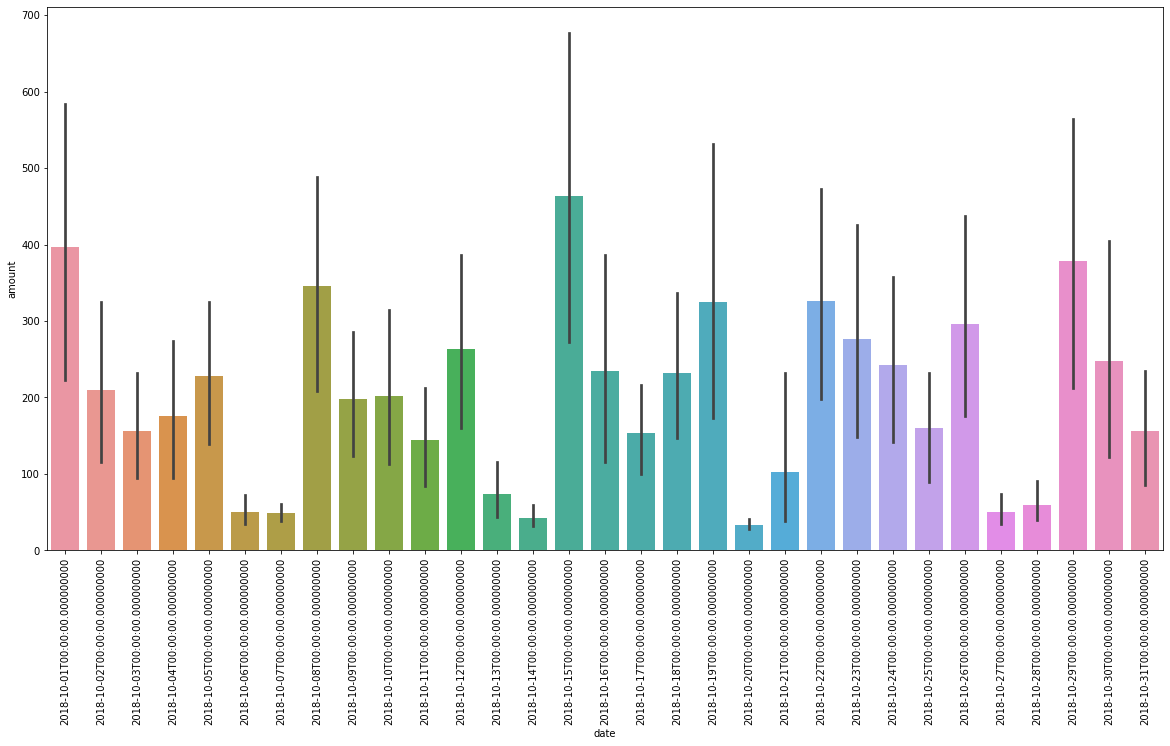

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.xticks(x=october_amount.index, label=october_amount.index, rotation='vertical')
sns.barplot(x=october_amount.index, y=october_amount['amount'], data = october_amount)    #passing palette='winter' param in here gives diff color
plt.show()

In [0]:
grouped_october = october_amount.groupby('date')['amount'].mean()

In [0]:
grouped_october.head()

date
2018-10-01    396.340097
2018-10-02    210.396129
2018-10-03    155.941688
2018-10-04    175.798365
2018-10-05    228.184464
Name: amount, dtype: float64

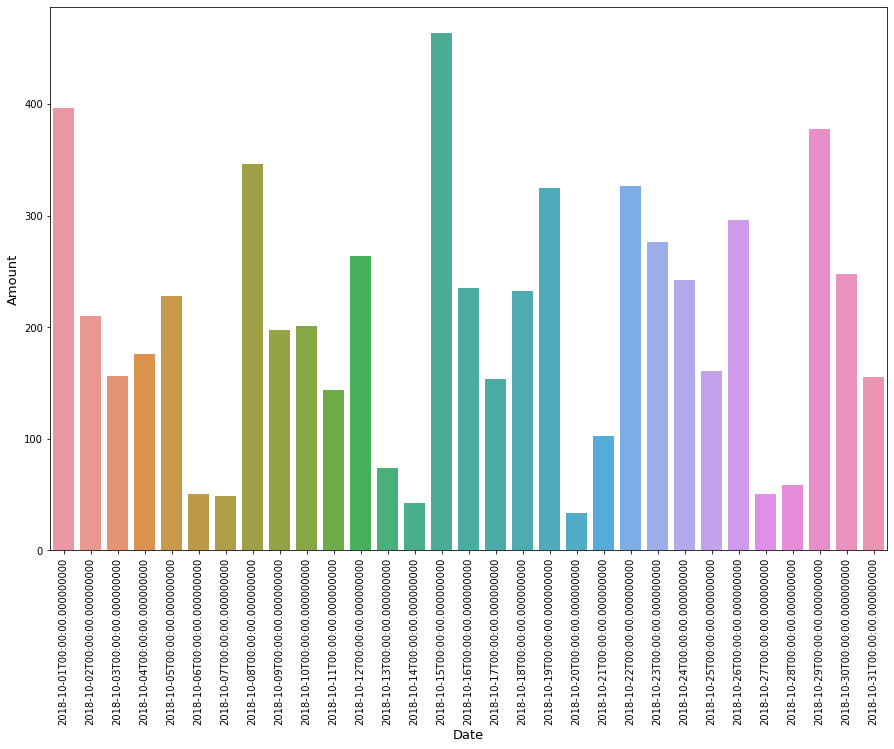

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_october.index, label=grouped_october.index, rotation='vertical')
sns.barplot(grouped_october.index, grouped_october.values)
plt.ylabel('Amount', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

On an average in the month of october more than 400 AUD has been transacted on October 15.

In [0]:
grouped_october_count = october_amount.groupby('date')['amount'].count()

In [0]:
grouped_october_count.head()

date
2018-10-01    103
2018-10-02    124
2018-10-03    160
2018-10-04    159
2018-10-05    168
Name: amount, dtype: int64

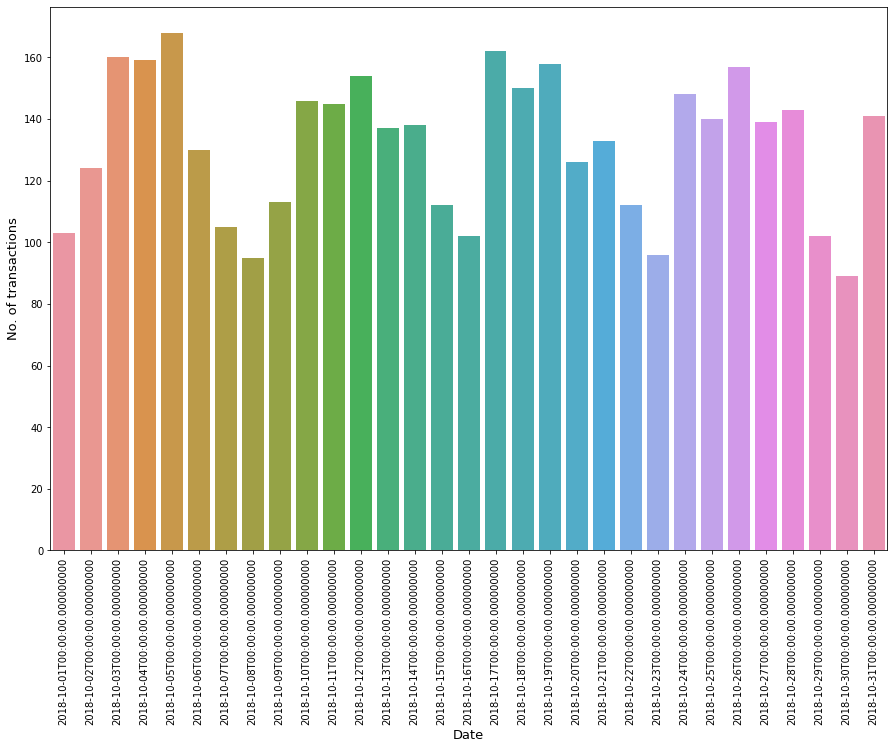

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_october_count.index, label=grouped_october_count.index, rotation='vertical')
sns.barplot(grouped_october_count.index, grouped_october_count.values)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

Highest number of transactions have been done on October 5.

In [0]:
grouped_october_max = october_amount.groupby('date')['amount'].max()

In [0]:
grouped_october_max.head()

date
2018-10-01    4405.30
2018-10-02    4132.23
2018-10-03    2639.76
2018-10-04    3676.94
2018-10-05    3649.51
Name: amount, dtype: float64

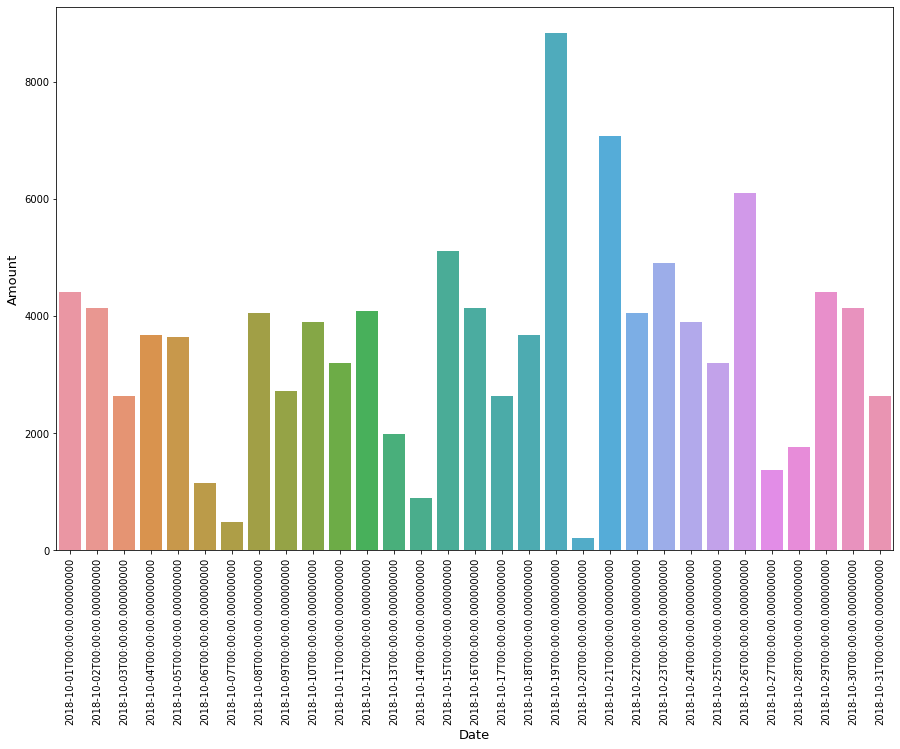

In [0]:
plt.subplots(figsize=(15, 10))
plt.xticks(x=grouped_october_max.index, label=grouped_october_max.index, rotation='vertical')
sns.barplot(grouped_october_max.index, grouped_october_max.values)
plt.ylabel('Amount', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.show()

More than 8000 AUD has been transacted on October 19.

In [0]:
gender_amount = df[['gender','amount']]

In [0]:
gender_amount.head()

,gender,amount
0,F,16.25
1,F,14.19
2,M,6.42
3,F,40.90
4,F,3.25


In [0]:
gender_amount_mean = gender_amount.groupby('gender')['amount'].mean()

In [0]:
gender_amount_mean

gender
F    168.517303
M    205.721809
Name: amount, dtype: float64

The overall average transaction amount of male account holders is more than than of the female account holders.

In [0]:
gender_amount_count = gender_amount.groupby('gender')['amount'].count()

In [0]:
gender_amount_count

gender
F    5758
M    6285
Name: amount, dtype: int64

More number of transactions can be found in male account holders.

In [0]:
gender_amount_max = gender_amount.groupby('gender')['amount'].max()

In [0]:
gender_amount_max

gender
F    7081.09
M    8835.98
Name: amount, dtype: float64

8835 AUD ,has been transacted by male account holder, which is the highest amount to be transacted.

In [0]:
gender_amount_min = gender_amount.groupby('gender')['amount'].min()

In [0]:
gender_amount_min

gender
F    0.1
M    0.1
Name: amount, dtype: float64

# **Checking the no. of transactions of the customers as per their age and gender**


In [0]:
customer_gender_age = df[['customer_id','gender','age']]

In [0]:
customer_gender_age.head()

,customer_id,gender,age
0,CUS-2487424745,F,26
1,CUS-2487424745,F,26
2,CUS-2142601169,M,38
3,CUS-1614226872,F,40
4,CUS-2487424745,F,26


In [0]:
customer_gender.shape

(12043, 2)

In [0]:
female = customer_gender_age[customer_gender['gender']=='F']

In [0]:
female.shape

(5758, 2)

In [0]:
female.head()

,customer_id,gender,age
0,CUS-2487424745,F,26
1,CUS-2487424745,F,26
3,CUS-1614226872,F,40
4,CUS-2487424745,F,26
6,CUS-4123612273,F,43


In [0]:
fe =  female.groupby('gender')['customer_id']

In [0]:
a = set(female['customer_id'])

In [0]:
len(a)

44

Out of 100 account holders there are 44 female account holders and 56 male account holders

In [0]:
female_cust_value = female.groupby('age')['customer_id'].value_counts()

In [0]:
female_cust_value.shape

(44,)

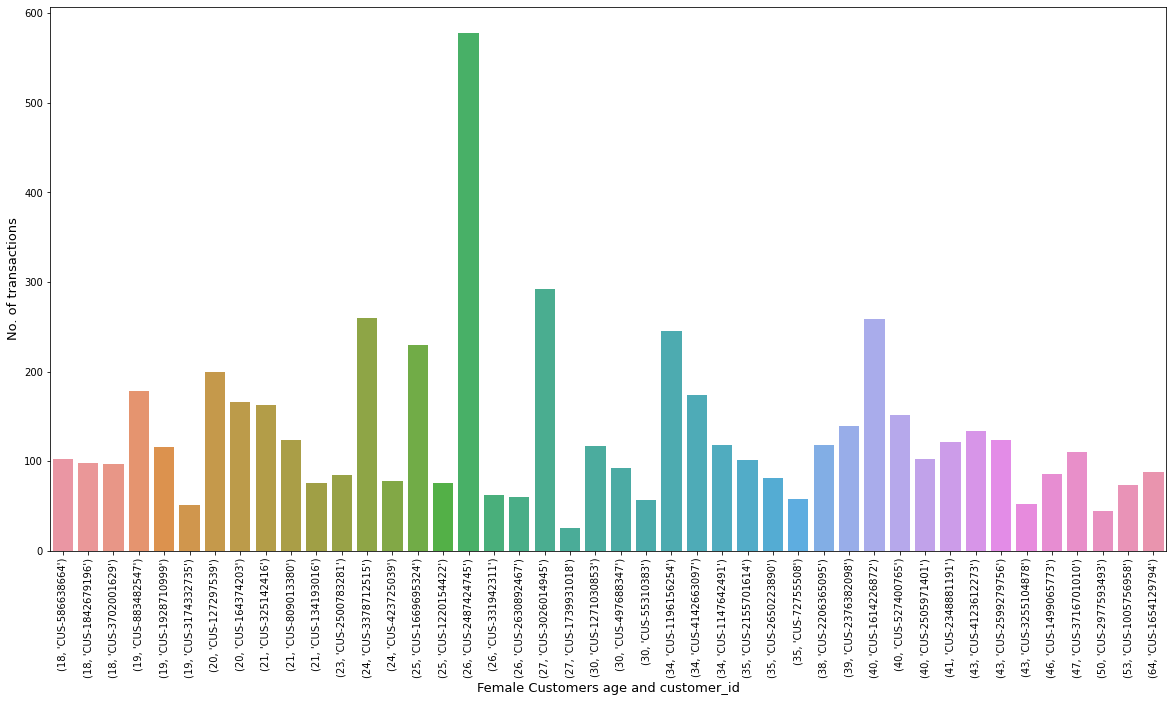

In [0]:
plt.subplots(figsize=(20, 10))
plt.xticks(x=female_cust_value.index, label=female_cust_value.index, rotation='vertical')
sns.barplot(female_cust_value.index, female_cust_value.values)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('Female Customers age and customer_id', fontsize=13)
plt.show()

In [0]:
male = customer_gender_age[customer_gender['gender']=='M']

In [0]:
male_cust_value = male.groupby('age')['customer_id'].value_counts()

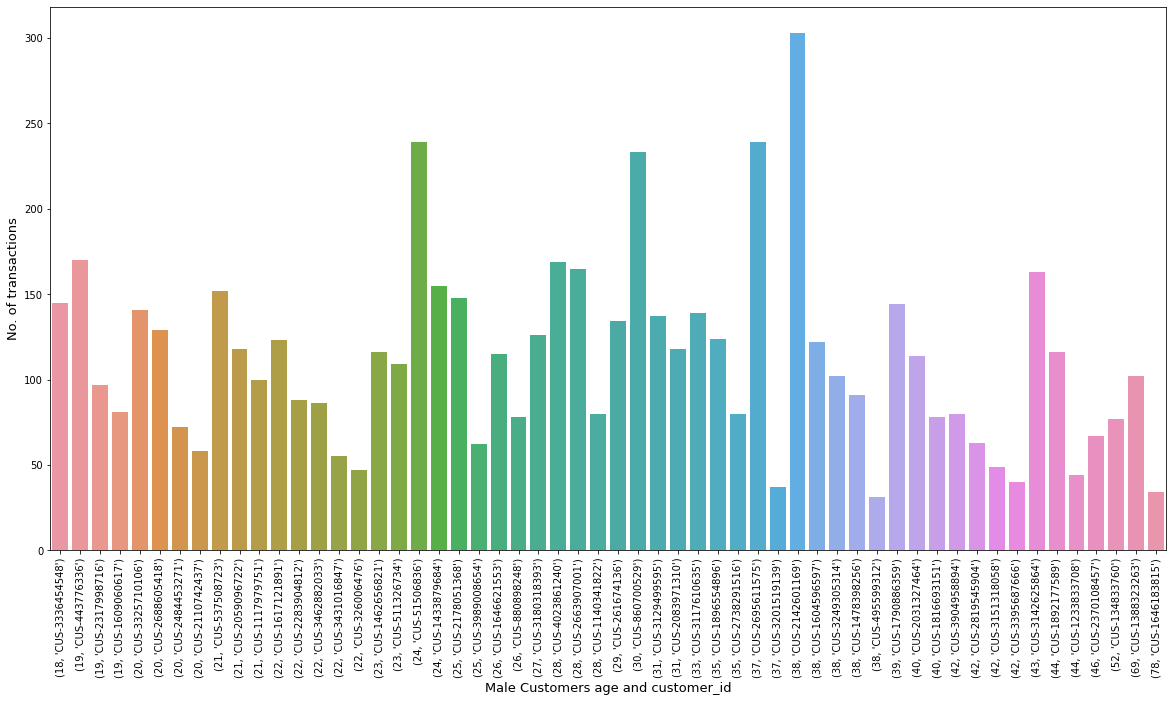

In [0]:
plt.subplots(figsize=(20, 10))
plt.xticks(x=male_cust_value.index, label=male_cust_value.index, rotation='vertical')
sns.barplot(male_cust_value.index, male_cust_value.values)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('Male Customers age and customer_id', fontsize=13)
plt.show()

# **Checking the amount transacted by the customers**

In [0]:
cust_age_gender_amount = df[['customer_id','age','gender','amount']]

In [0]:
cust_age_gender_amount.head()

,customer_id,age,gender,amount
0,CUS-2487424745,26,F,16.25
1,CUS-2487424745,26,F,14.19
2,CUS-2142601169,38,M,6.42
3,CUS-1614226872,40,F,40.90
4,CUS-2487424745,26,F,3.25


**Average Amount**

**Dividing the male and female customers**

In [0]:
female_cust_age_amount = cust_age_gender_amount[cust_age_gender_amount['gender'] == 'F']

In [0]:
female_cust_age_amount.head()

,customer_id,age,gender,amount
0,CUS-2487424745,26,F,16.25
1,CUS-2487424745,26,F,14.19
3,CUS-1614226872,40,F,40.90
4,CUS-2487424745,26,F,3.25
6,CUS-4123612273,43,F,61.06


In [0]:
female_constant_mean = female_cust_age_amount['amount'].mean()

In [0]:
female_constant_mean

168.5173028829451

In [0]:
female_mean = female_cust_age_amount.groupby(['customer_id','age'])['amount'].mean()

In [0]:
female_mean.shape

(44,)

There are 44 female account holders and 56 male account holders

In [0]:
a = female_mean < female_constant_mean

In [0]:
count = 0
for elements in a :
  if elements == True :
    #print(elements)
    count = count + 1
print(count)

17


Out of 44 females, 17 of them have average transactions less than the overall transactions.

In [0]:
female_cust_age_amount_mean = female_cust_age_amount.groupby(['customer_id','age'])['amount'].mean().sort_values(ascending=False).head(10)

**Female customers with high average transactions**

In [0]:
female_cust_age_amount_mean

customer_id     age
CUS-55310383    30     497.669474
CUS-3174332735  19     489.220980
CUS-1739931018  27     426.108800
CUS-2155701614  35     375.681089
CUS-2500783281  23     314.383571
CUS-2977593493  50     307.334318
CUS-2505971401  40     291.293333
CUS-1220154422  25     274.614800
CUS-3255104878  43     254.994615
CUS-1271030853  30     248.545128
Name: amount, dtype: float64

In [0]:
male_cust_age_amount = cust_age_gender_amount[cust_age_gender_amount['gender'] == 'M']

In [0]:
male_cust_age_amount.head()

,customer_id,age,gender,amount
2,CUS-2142601169,38,M,6.42
5,CUS-2688605418,20,M,163.00
9,CUS-2031327464,40,M,21.00
10,CUS-2317998716,19,M,27.00
13,CUS-1462656821,23,M,25.00


In [0]:
male_constant_mean = male_cust_age_amount['amount'].mean()

In [0]:
male_constant_mean

205.72180906921264

In [0]:
male_mean = male_cust_age_amount.groupby(['customer_id','age'])['amount'].mean()

In [0]:
b = male_mean < male_constant_mean

In [0]:
count = 0
for elements in b :
  if elements == True :
    #print(elements)
    count = count + 1
print(count)

27


Out of 56 males, 27 of them have average transactions less than the overall transactions.

In [0]:
male_cust_age_amount_mean = male_cust_age_amount.groupby(['customer_id','age'])['amount'].mean().sort_values(ascending=False).head(10)

**Male customers with high average transactions**

In [0]:
male_cust_age_amount_mean

customer_id     age
CUS-495599312   38     693.632903
CUS-2738291516  35     567.614500
CUS-1816693151  40     515.583846
CUS-2819545904  42     448.658413
CUS-134833760   52     418.742468
CUS-3201519139  37     392.840811
CUS-3395687666  42     355.400250
CUS-1117979751  21     339.843700
CUS-3151318058  42     335.183673
CUS-326006476   22     333.786596
Name: amount, dtype: float64

**Max Amount**

In [0]:
female_cust_age_amount_max = female_cust_age_amount.groupby(['customer_id','age'])['amount'].max().sort_values(ascending=False).head(10)

Females with high amount transactions

In [0]:
female_cust_age_amount_max

customer_id     age
CUS-1271030853  30     7081.09
CUS-2376382098  39     5103.51
CUS-497688347   30     4910.90
CUS-1739931018  27     4863.62
CUS-527400765   40     4216.04
CUS-883482547   19     3977.46
CUS-1196156254  34     3903.73
CUS-423725039   24     3712.56
CUS-325142416   21     3680.71
CUS-3174332735  19     3676.94
Name: amount, dtype: float64

In [0]:
male_cust_age_amount_max = male_cust_age_amount.groupby(['customer_id','age'])['amount'].max().sort_values(ascending=False).head(10)

Males with high amount transactions

In [0]:
male_cust_age_amount_max

customer_id     age
CUS-1816693151  40     8835.98
CUS-2178051368  25     6107.23
CUS-51506836    24     6024.49
CUS-261674136   29     4405.30
CUS-2738291516  35     4233.00
CUS-3336454548  18     4132.23
CUS-2695611575  37     4094.33
CUS-2663907001  28     4054.77
CUS-1462656821  23     3903.95
CUS-134833760   52     3785.78
Name: amount, dtype: float64

**No. of transactions with respect to amount**

In [0]:
female_cust_age_amount_count = female_cust_age_amount.groupby(['customer_id','age'])['amount'].count().sort_values(ascending=False).head(10)

Top 10 high number of transactions done by females

In [0]:
female_cust_age_amount_count

customer_id     age
CUS-2487424745  26     578
CUS-3026014945  27     292
CUS-3378712515  24     260
CUS-1614226872  40     259
CUS-1196156254  34     245
CUS-1669695324  25     230
CUS-127297539   20     199
CUS-883482547   19     178
CUS-4142663097  34     174
CUS-164374203   20     166
Name: amount, dtype: int64

In [0]:
female_cust_age_amount_count_tail = female_cust_age_amount.groupby(['customer_id','age'])['amount'].count().sort_values(ascending=False).tail(10)

In [0]:
female_cust_age_amount_count_tail

customer_id     age
CUS-1220154422  25     75
CUS-1005756958  53     73
CUS-331942311   26     62
CUS-2630892467  26     60
CUS-72755508    35     58
CUS-55310383    30     57
CUS-3255104878  43     52
CUS-3174332735  19     51
CUS-2977593493  50     44
CUS-1739931018  27     25
Name: amount, dtype: int64

Females have done more than 25 transactions.

In [0]:
male_cust_age_amount_count = male_cust_age_amount.groupby(['customer_id','age'])['amount'].count().sort_values(ascending=False).head(10)

Top 10 high number of transactions done by male.

In [0]:
male_cust_age_amount_count

customer_id     age
CUS-2142601169  38     303
CUS-51506836    24     239
CUS-2695611575  37     239
CUS-860700529   30     233
CUS-443776336   19     170
CUS-4023861240  28     169
CUS-2663907001  28     165
CUS-3142625864  43     163
CUS-1433879684  24     155
CUS-537508723   21     152
Name: amount, dtype: int64

In [0]:
male_cust_age_amount_count_tail = male_cust_age_amount.groupby(['customer_id','age'])['amount'].count().sort_values(ascending=False).tail(10)

In [0]:
male_cust_age_amount_count_tail

customer_id     age
CUS-3989008654  25     62
CUS-2110742437  20     58
CUS-3431016847  22     55
CUS-3151318058  42     49
CUS-326006476   22     47
CUS-1233833708  44     44
CUS-3395687666  42     40
CUS-3201519139  37     37
CUS-1646183815  78     34
CUS-495599312   38     31
Name: amount, dtype: int64

Males have done more than 31 transactions.

# **Checking the balance maintained by the customer**

In [0]:
cust_age_gender_amount = df[['customer_id','age','gender','balance']]

In [0]:
cust_age_gender_amount.head()

,customer_id,age,gender,balance
0,CUS-2487424745,26,F,35.39
1,CUS-2487424745,26,F,21.20
2,CUS-2142601169,38,M,5.71
3,CUS-1614226872,40,F,2117.22
4,CUS-2487424745,26,F,17.95


In [0]:
female_cust_age_balance = cust_age_gender_amount[cust_age_gender_amount['gender'] == 'F']

In [0]:
male_cust_age_balance = cust_age_gender_amount[cust_age_gender_amount['gender'] == 'M']

**Balance mean**

In [0]:
female_cust_age_balance_mean = female_cust_age_balance.groupby(['customer_id','age'])['balance'].mean().sort_values(ascending=False).head(10)

Top high average balance maintained by female account holders.

In [0]:
female_cust_age_balance_mean

customer_id     age
CUS-527400765   40     198565.143775
CUS-3255104878  43      30331.218654
CUS-2977593493  50      27910.780682
CUS-1196156254  34      22272.433755
CUS-2206365095  38      20339.566695
CUS-1499065773  46      19977.298023
CUS-2155701614  35      14164.792871
CUS-2376382098  39      12140.713741
CUS-2505971401  40      11747.912549
CUS-3174332735  19      10214.368039
Name: balance, dtype: float64

In [0]:
male_cust_age_balance_mean = male_cust_age_balance.groupby(['customer_id','age'])['balance'].mean().sort_values(ascending=False).head(10)

Top high average balance maintained by male account holders.

In [0]:
male_cust_age_balance_mean

customer_id     age
CUS-2370108457  46     263753.766119
CUS-2819545904  42     111300.797619
CUS-1816693151  40      65420.404231
CUS-3117610635  33      61491.350647
CUS-495599312   38      57566.579032
CUS-1609060617  19      56685.795802
CUS-1646183815  78      54240.641471
CUS-3462882033  22      46338.733837
CUS-2663907001  28      39427.873576
CUS-3249305314  38      38687.672843
Name: balance, dtype: float64

**Max Balance**

In [0]:
female_cust_age_balance_max = female_cust_age_balance.groupby(['customer_id','age'])['balance'].max().sort_values(ascending=False).head(10)

Top 10 female account holders with high amount in their account.

In [0]:
female_cust_age_balance_max

customer_id     age
CUS-527400765   40     208926.10
CUS-3255104878  43      34572.50
CUS-1196156254  34      31350.50
CUS-2977593493  50      30873.87
CUS-2155701614  35      27160.77
CUS-1499065773  46      24857.97
CUS-2376382098  39      24135.54
CUS-2206365095  38      22480.73
CUS-2505971401  40      21213.46
CUS-3174332735  19      20858.72
Name: balance, dtype: float64

In [0]:
male_cust_age_balance_max = male_cust_age_balance.groupby(['customer_id','age'])['balance'].max().sort_values(ascending=False).head(10)

Top 10 female account holders with high amount in their account.

In [0]:
male_cust_age_balance_max

customer_id     age
CUS-2370108457  46     267128.52
CUS-2819545904  42     120372.61
CUS-1816693151  40      85890.29
CUS-3117610635  33      68167.53
CUS-495599312   38      63656.55
CUS-1609060617  19      63597.43
CUS-1646183815  78      58535.16
CUS-3462882033  22      56525.54
CUS-2663907001  28      47613.15
CUS-3249305314  38      45539.67
Name: balance, dtype: float64

# **Checking the credit and debit movements of the customers**

In [0]:
cust_age_gender_movement = df[['customer_id','age','gender','movement']]

In [0]:
cust_age_gender_movement.head()

,customer_id,age,gender,movement
0,CUS-2487424745,26,F,debit
1,CUS-2487424745,26,F,debit
2,CUS-2142601169,38,M,debit
3,CUS-1614226872,40,F,debit
4,CUS-2487424745,26,F,debit


In [0]:
female_cust_age_movement = cust_age_gender_movement[cust_age_gender_movement['gender'] == 'F']

In [0]:
male_cust_age_movement = cust_age_gender_movement[cust_age_gender_movement['gender'] == 'M']

In [0]:
female_cust_age_movement_count = female_cust_age_movement.groupby(['customer_id','age'])['movement'].value_counts().sort_values(ascending=False).head(10)

In [0]:
female_cust_age_movement_count

customer_id     age  movement
CUS-2487424745  26   debit       564
CUS-3026014945  27   debit       285
CUS-3378712515  24   debit       247
CUS-1614226872  40   debit       246
CUS-1196156254  34   debit       238
CUS-1669695324  25   debit       217
CUS-127297539   20   debit       186
CUS-883482547   19   debit       171
CUS-4142663097  34   debit       167
CUS-325142416   21   debit       156
Name: movement, dtype: int64

In [0]:
female_cust_age_movement_count_tail = female_cust_age_movement.groupby(['customer_id','age'])['movement'].value_counts().sort_values(ascending=False).tail(10)

In [0]:
female_cust_age_movement_count_tail

customer_id     age  movement
CUS-3174332735  19   credit      6
CUS-2599279756  43   credit      6
CUS-586638664   18   credit      6
CUS-2348881191  41   credit      6
CUS-2206365095  38   credit      6
CUS-1499065773  46   credit      6
CUS-2376382098  39   credit      5
CUS-423725039   24   credit      3
CUS-497688347   30   credit      2
CUS-1739931018  27   credit      2
Name: movement, dtype: int64

In [0]:
male_cust_age_movement_count = male_cust_age_movement.groupby(['customer_id','age'])['movement'].value_counts().sort_values(ascending=False).head(10)

In [0]:
male_cust_age_movement_count

customer_id     age  movement
CUS-2142601169  38   debit       290
CUS-51506836    24   debit       237
CUS-860700529   30   debit       227
CUS-2695611575  37   debit       226
CUS-4023861240  28   debit       162
CUS-2663907001  28   debit       159
CUS-443776336   19   debit       157
CUS-3142625864  43   debit       150
CUS-1433879684  24   debit       148
CUS-2178051368  25   debit       146
Name: movement, dtype: int64

In [0]:
male_cust_age_movement_count_tail = male_cust_age_movement.groupby(['customer_id','age'])['movement'].value_counts().sort_values(ascending=False).tail(10)

In [0]:
male_cust_age_movement_count_tail

customer_id     age  movement
CUS-2484453271  20   credit      6
CUS-2370108457  46   credit      6
CUS-2283904812  22   credit      6
CUS-2083971310  31   credit      6
CUS-1896554896  35   credit      6
CUS-880898248   26   credit      6
CUS-1816693151  40   credit      4
CUS-2110742437  20   credit      4
CUS-2178051368  25   credit      2
CUS-51506836    24   credit      2
Name: movement, dtype: int64

# **No. of transactions as per the weekdays**

In [0]:
date_amount = df[['date','amount']]

In [0]:
date_amount.shape

(12043, 2)

In [0]:
date_amount['date'] = pd.to_datetime(date_amount['date'])
date_amount.set_index('date', inplace=True)
date_amount.index

DatetimeIndex(['2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01',
               ...
               '2018-10-31', '2018-10-31', '2018-10-31', '2018-10-31',
               '2018-10-31', '2018-10-31', '2018-10-31', '2018-10-31',
               '2018-10-31', '2018-10-31'],
              dtype='datetime64[ns]', name='date', length=12043, freq=None)

In [0]:
weekdays = date_amount.index.weekday

In [0]:
weekdays['day'] = pd.DataFrame(weekdays)

In [0]:
weekdays.shape

(12043, 2)

In [0]:
weekdays = weekdays.drop('date',axis = 1)

In [0]:
date_amount_weekdays = pd.concat([date_amount,weekdays],axis = 1)

In [0]:
date_amount_weekdays.shape

(12043, 3)

In [0]:
date_amount_weekdays.head()

,date,amount,day
0,2018-08-01,16.25,2
1,2018-08-01,14.19,2
2,2018-08-01,6.42,2
3,2018-08-01,40.90,2
4,2018-08-01,3.25,2


In [0]:
weekdays.nunique()

date    7
dtype: int64

In [0]:
weekdays.shape

(12043, 1)

In [0]:
days = date_amount_weekdays.groupby('day')['amount'].count()

In [0]:
days

day
0    1360
1    1487
2    2063
3    1801
4    2073
5    1709
6    1550
Name: amount, dtype: int64

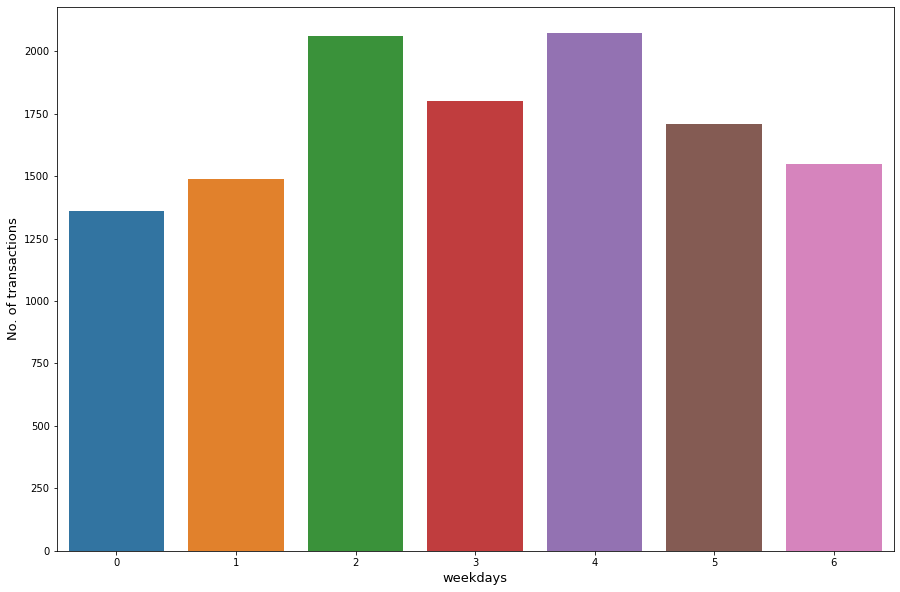

In [0]:
plt.subplots(figsize=(15, 10))
sns.barplot(days.index, days.values)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('weekdays', fontsize=13)
plt.show()

More transactions have happened on the 2nd and 4th day of the week.

# **Hourly Insights**

In [0]:
extraction_amount = df[['extraction','amount']]

In [0]:
extraction_amount.shape

(12043, 2)

In [0]:
extraction_amount.head()

,extraction,amount
0,2018-08-01T01:01:15.000+0000,16.25
1,2018-08-01T01:13:45.000+0000,14.19
2,2018-08-01T01:26:15.000+0000,6.42
3,2018-08-01T01:38:45.000+0000,40.90
4,2018-08-01T01:51:15.000+0000,3.25


In [0]:
extraction_amount['extraction'] = pd.to_datetime(extraction_amount['extraction'])
extraction_amount.set_index('extraction', inplace=True)
extraction_amount.index

DatetimeIndex(['2018-08-01 01:01:15+00:00', '2018-08-01 01:13:45+00:00',
               '2018-08-01 01:26:15+00:00', '2018-08-01 01:38:45+00:00',
               '2018-08-01 01:51:15+00:00', '2018-08-01 02:00:00+00:00',
               '2018-08-01 02:23:04+00:00', '2018-08-01 04:11:25+00:00',
               '2018-08-01 04:40:00+00:00', '2018-08-01 06:00:00+00:00',
               ...
               '2018-10-31 22:22:21+00:00', '2018-10-31 22:51:45+00:00',
               '2018-10-31 23:00:00+00:00', '2018-10-31 23:00:00+00:00',
               '2018-10-31 23:00:00+00:00', '2018-10-31 23:09:06+00:00',
               '2018-10-31 23:21:46+00:00', '2018-10-31 23:34:25+00:00',
               '2018-10-31 23:47:05+00:00', '2018-10-31 23:59:44+00:00'],
              dtype='datetime64[ns, UTC]', name='extraction', length=12043, freq=None)

In [0]:
extraction_amount.shape

(12043, 1)

In [0]:
hours = extraction_amount.index.hour

In [0]:
hours

Int64Index([ 1,  1,  1,  1,  1,  2,  2,  4,  4,  6,
            ...
            22, 22, 23, 23, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='extraction', length=12043)

In [0]:
hours = pd.DataFrame(hours)

In [0]:
hours['hours'] = pd.DataFrame(hours)

In [0]:
hours.head()

,extraction,hours
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [0]:
hours = hours.drop('extraction',axis =1)

In [0]:
hours.shape

(12043, 1)

In [0]:
hours_amount = pd.concat([extraction_amount,hours],axis=1)

In [0]:
hours_amount.head()

,extraction,amount,hours
0,2018-08-01T01:01:15.000+0000,16.25,1
1,2018-08-01T01:13:45.000+0000,14.19,1
2,2018-08-01T01:26:15.000+0000,6.42,1
3,2018-08-01T01:38:45.000+0000,40.90,1
4,2018-08-01T01:51:15.000+0000,3.25,1


In [0]:
hours_amount_count =  hours_amount.groupby('hours')['amount'].count()

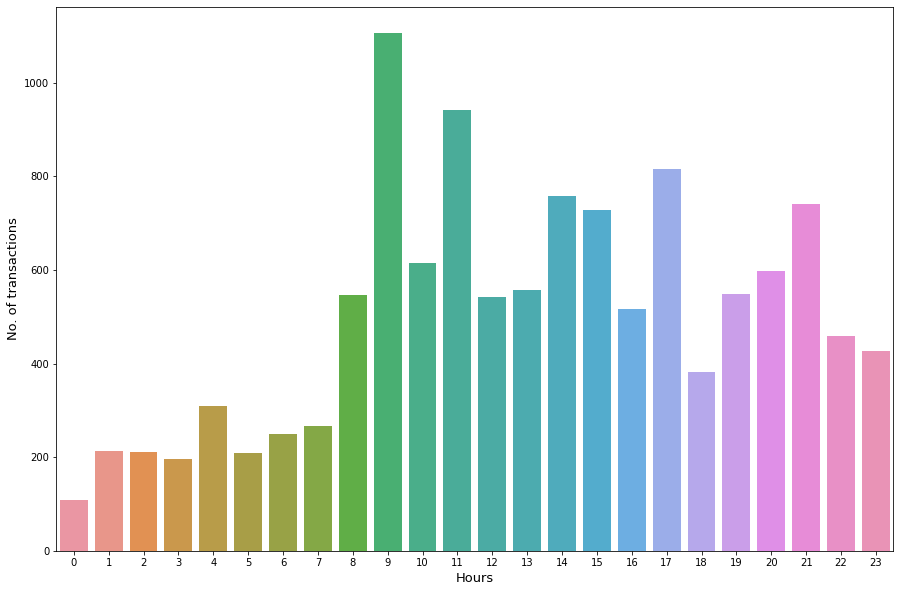

In [0]:
plt.subplots(figsize=(15, 10))
sns.barplot(hours_amount_count.index, hours_amount_count.values)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('Hours', fontsize=13)
plt.show()

Highest number of transactions can be observed around 9 a.m .

# **Distance**

In [0]:
long_lat = df[['long_lat']]

In [0]:
long_lat.head()

,long_lat
0,153.41 -27.95
1,153.41 -27.95
2,151.23 -33.94
3,153.10 -27.66
4,153.41 -27.95


In [262]:
long_lat.isnull().sum()

long_lat    0
dtype: int64

In [0]:
long_lat.max()

'255.00 -573.00'

The above value is out of range.Hence we remove it.

In [0]:
long_lat_new = long_lat[long_lat['long_lat'] != '255.00 -573.00']

In [306]:
long_lat_new.head()

,long_lat
0,153.41 -27.95
1,153.41 -27.95
2,151.23 -33.94
3,153.10 -27.66
4,153.41 -27.95


In [264]:
long_lat_new.isnull().sum()

long_lat    0
dtype: int64

In [0]:
merchant_long_lat = df[['merchant_long_lat']]

In [247]:
merchant_long_lat.head()

,merchant_long_lat
0,153.38 -27.99
1,151.21 -33.87
2,151.21 -33.87
3,153.05 -26.68
4,153.44 -28.06


In [288]:
merchant_long_lat.isnull().sum()

merchant_long_lat    4326
dtype: int64

In [0]:
merchant_long_lat = merchant_long_lat.dropna()

In [242]:
merchant_long_lat.isnull().sum()

merchant_long_lat    0
dtype: int64

In [0]:
merchant_long_lat = merchant_long_lat.astype('str')

In [290]:
sender = []
for elements in long_lat_new['long_lat']:
  a=elements.split(' ')
  sender.append(a)
print(sender)

[['153.41', '-27.95'], ['153.41', '-27.95'], ['151.23', '-33.94'], ['153.10', '-27.66'], ['153.41', '-27.95'], ['151.22', '-33.87'], ['144.95', '-37.76'], ['144.95', '-37.76'], ['116.06', '-32.00'], ['151.23', '-33.96'], ['146.94', '-36.04'], ['144.95', '-37.76'], ['116.06', '-32.00'], ['151.27', '-33.76'], ['145.16', '-37.84'], ['153.05', '-27.61'], ['144.99', '-37.90'], ['149.03', '-34.97'], ['115.72', '-32.28'], ['145.45', '-37.74'], ['153.41', '-27.95'], ['153.32', '-27.93'], ['115.74', '-31.72'], ['145.35', '-38.03'], ['147.08', '-37.97'], ['151.04', '-33.80'], ['150.92', '-33.77'], ['150.82', '-34.01'], ['152.99', '-27.49'], ['150.82', '-34.01'], ['153.10', '-27.66'], ['138.52', '-35.01'], ['145.45', '-37.74'], ['145.73', '-17.03'], ['114.62', '-28.80'], ['114.62', '-28.80'], ['152.99', '-27.49'], ['153.09', '-27.48'], ['115.79', '-31.79'], ['145.09', '-37.82'], ['153.10', '-27.66'], ['150.68', '-33.79'], ['145.03', '-37.88'], ['144.71', '-37.58'], ['150.90', '-33.78'], ['147.08'

In [291]:
long_lat1 = []
long_lat2 = []
for num in sender:
  long_lat1.append(num[0])
  long_lat2.append(num[1])
print(long_lat1)
print(long_lat2)

['153.41', '153.41', '151.23', '153.10', '153.41', '151.22', '144.95', '144.95', '116.06', '151.23', '146.94', '144.95', '116.06', '151.27', '145.16', '153.05', '144.99', '149.03', '115.72', '145.45', '153.41', '153.32', '115.74', '145.35', '147.08', '151.04', '150.92', '150.82', '152.99', '150.82', '153.10', '138.52', '145.45', '145.73', '114.62', '114.62', '152.99', '153.09', '115.79', '145.09', '153.10', '150.68', '145.03', '144.71', '150.90', '147.08', '138.67', '144.89', '145.35', '151.27', '151.23', '142.77', '150.90', '151.23', '145.35', '145.13', '145.45', '145.73', '145.00', '145.01', '149.03', '116.06', '151.18', '143.83', '115.98', '151.12', '145.00', '145.73', '144.95', '145.35', '153.41', '150.68', '145.45', '130.90', '153.10', '150.82', '151.23', '138.61', '151.27', '145.04', '150.82', '115.78', '130.84', '147.08', '115.78', '145.03', '144.79', '115.81', '138.52', '150.68', '115.78', '130.98', '151.22', '150.68', '143.83', '145.04', '144.96', '150.68', '145.17', '149.03',

In [0]:
long_lat1 = pd.DataFrame(long_lat1)
long_lat2 = pd.DataFrame(long_lat2)

In [294]:
reciever = []
for elements in merchant_long_lat['merchant_long_lat']:
  a = elements.split(' ')
  reciever.append(a)
print(reciever)

[['153.38', '-27.99'], ['151.21', '-33.87'], ['151.21', '-33.87'], ['153.05', '-26.68'], ['153.44', '-28.06'], ['144.95', '-37.53'], ['144.96', '-37.81'], ['115.85', '-31.9'], ['115.86', '-32.13'], ['152.94', '-27.55'], ['144.96', '-37.78'], ['153.6', '-28.63'], ['153.28', '-28.81'], ['115.76', '-32.06'], ['145.09', '-38.01'], ['151.18', '-33.8'], ['151', '-33.83'], ['153.08', '-26.61'], ['151.19', '-33.92'], ['152.99', '-27.21'], ['138.53', '-34.9'], ['145.13', '-37.78'], ['145.7', '-16.81'], ['153.44', '-28.84'], ['121.33', '-28.9'], ['153.05', '-27.51'], ['153.05', '-27.66'], ['115.84', '-31.95'], ['145.03', '-37.74'], ['150.6', '-34.84'], ['151.21', '-33.87'], ['145.13', '-37.78'], ['145.21', '-38.03'], ['115.07', '-33.95'], ['142.77', '-34.58'], ['151.2', '-33.79'], ['151.18', '-33.8'], ['145.35', '-16.47'], ['144.63', '-37.7'], ['151.21', '-33.87'], ['145.65', '-35.92'], ['145.32', '-37.8'], ['133.67', '-32.11'], ['150.99', '-33.9'], ['144.4', '-38.02'], ['150.83', '-33.79'], ['1

In [295]:
long_lat3 = []
long_lat4 = []
for num in reciever:
  long_lat3.append(num[0])
  long_lat4.append(num[1])
print(long_lat3)
print(long_lat4)

['153.38', '151.21', '151.21', '153.05', '153.44', '144.95', '144.96', '115.85', '115.86', '152.94', '144.96', '153.6', '153.28', '115.76', '145.09', '151.18', '151', '153.08', '151.19', '152.99', '138.53', '145.13', '145.7', '153.44', '121.33', '153.05', '153.05', '115.84', '145.03', '150.6', '151.21', '145.13', '145.21', '115.07', '142.77', '151.2', '151.18', '145.35', '144.63', '151.21', '145.65', '145.32', '133.67', '150.99', '144.4', '150.83', '144.96', '130.84', '152.92', '150.91', '151.27', '144.99', '151.1', '115.8', '130.85', '145.16', '152.46', '144.98', '145.17', '151.18', '151.27', '143.81', '147.59', '145.01', '139', '151.21', '145.28', '130.98', '153.41', '138.84', '146.97', '144.94', '147.38', '153.47', '146.81', '149.16', '153.12', '147.5', '144.84', '145.06', '153.47', '148.91', '153.41', '151.01', '144.95', '115.74', '144.78', '151.06', '153.38', '145.12', '144.96', '115.95', '144.97', '147.63', '115.84', '153.19', '153.05', '151.21', '115.81', '138.6', '153.45', '115

In [0]:
long_lat3 = pd.DataFrame(long_lat3)
long_lat4 = pd.DataFrame(long_lat4)

In [0]:
long_lat_df = pd.concat([long_lat1,long_lat2,long_lat3,long_lat4],axis = 1)

In [298]:
long_lat_df.head()

,0,0,0,0
0,153.41,-27.95,153.38,-27.99
1,153.41,-27.95,151.21,-33.87
2,151.23,-33.94,151.21,-33.87
3,153.10,-27.66,153.05,-26.68
4,153.41,-27.95,153.44,-28.06


In [0]:
long_lat_df.columns = ['long_lat1','long_lat2','long_lat3','long_lat4']

In [300]:
long_lat_df.head()

,long_lat1,long_lat2,long_lat3,long_lat4
0,153.41,-27.95,153.38,-27.99
1,153.41,-27.95,151.21,-33.87
2,151.23,-33.94,151.21,-33.87
3,153.10,-27.66,153.05,-26.68
4,153.41,-27.95,153.44,-28.06


In [301]:
long_lat_df.isnull().sum()

long_lat1       0
long_lat2       0
long_lat3    4203
long_lat4    4203
dtype: int64

In [0]:
long_lat_df = long_lat_df.dropna()

In [0]:
import geopy.distance
def distancer(row):
    coords_1 = (row['long_lat2'], row['long_lat1'])
    coords_2 = (row['long_lat4'], row['long_lat3'])
    return distance.distance(coords_1, coords_2).km

long_lat_df['Distance'] = long_lat_df.apply(distancer, axis=1)

In [304]:
long_lat_df

,long_lat1,long_lat2,long_lat3,long_lat4,Distance
0,153.41,-27.95,153.38,-27.99,5.325572
1,153.41,-27.95,151.21,-33.87,689.150933
2,151.23,-33.94,151.21,-33.87,7.981742
3,153.10,-27.66,153.05,-26.68,108.703089
4,153.41,-27.95,153.44,-28.06,12.542187
...,...,...,...,...,...
7712,151.23,-33.94,145.23,-37.81,691.080472
7713,153.41,-27.95,150.88,-33.96,708.739150
7714,153.10,-27.66,150.92,-33.74,705.610617
7715,143.83,-37.66,145.09,-37.91,114.406148


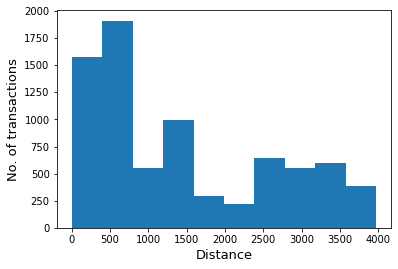

In [305]:
x = long_lat_df['Distance']
#Create histogram plot
plt.hist(x)
plt.ylabel('No. of transactions', fontsize=13)
plt.xlabel('Distance', fontsize=13)
plt.show()